<a href="https://colab.research.google.com/github/erickgt00/Deep-Learning/blob/main/Prediccion_Microsoft.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Predicción del Precio de Microsoft con Keras

In [63]:
#PASO 0. INSTALACION DE LIBRERIAS
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pandas import read_csv
from matplotlib import pyplot
from numpy import array
from numpy import append

In [99]:
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense
from keras.models import load_model

In [6]:
serieP=array([10,25,23,14,25,23,14,85,14,36,10,25,23,14,25,23,14,85,14,36,10,25,23,14,25,23,14,85,14,36,10,25,23,14,25,23])
print(serieP)

[10 25 23 14 25 23 14 85 14 36 10 25 23 14 25 23 14 85 14 36 10 25 23 14
 25 23 14 85 14 36 10 25 23 14 25 23]


In [7]:
def DescomponerSerie(serie,longitud):
    global X, y
    X, y=list(), list()
    for i in range(len(serie)):
        final=i+longitud
        if final > len(serie)-1:
            break
        historia_x, target_y=serie[i:final], serie[final]
        X.append(historia_x)
        y.append(target_y)
    return array(X), array(y)

In [10]:
DescomponerSerie(serieP,12)

(array([[10, 25, 23, 14, 25, 23, 14, 85, 14, 36, 10, 25],
        [25, 23, 14, 25, 23, 14, 85, 14, 36, 10, 25, 23],
        [23, 14, 25, 23, 14, 85, 14, 36, 10, 25, 23, 14],
        [14, 25, 23, 14, 85, 14, 36, 10, 25, 23, 14, 25],
        [25, 23, 14, 85, 14, 36, 10, 25, 23, 14, 25, 23],
        [23, 14, 85, 14, 36, 10, 25, 23, 14, 25, 23, 14],
        [14, 85, 14, 36, 10, 25, 23, 14, 25, 23, 14, 85],
        [85, 14, 36, 10, 25, 23, 14, 25, 23, 14, 85, 14],
        [14, 36, 10, 25, 23, 14, 25, 23, 14, 85, 14, 36],
        [36, 10, 25, 23, 14, 25, 23, 14, 85, 14, 36, 10],
        [10, 25, 23, 14, 25, 23, 14, 85, 14, 36, 10, 25],
        [25, 23, 14, 25, 23, 14, 85, 14, 36, 10, 25, 23],
        [23, 14, 25, 23, 14, 85, 14, 36, 10, 25, 23, 14],
        [14, 25, 23, 14, 85, 14, 36, 10, 25, 23, 14, 25],
        [25, 23, 14, 85, 14, 36, 10, 25, 23, 14, 25, 23],
        [23, 14, 85, 14, 36, 10, 25, 23, 14, 25, 23, 14],
        [14, 85, 14, 36, 10, 25, 23, 14, 25, 23, 14, 85],
        [85, 1

In [11]:
for i in range(len(X)):
    print(X[i], y[i])

[10 25 23 14 25 23 14 85 14 36 10 25] 23
[25 23 14 25 23 14 85 14 36 10 25 23] 14
[23 14 25 23 14 85 14 36 10 25 23 14] 25
[14 25 23 14 85 14 36 10 25 23 14 25] 23
[25 23 14 85 14 36 10 25 23 14 25 23] 14
[23 14 85 14 36 10 25 23 14 25 23 14] 85
[14 85 14 36 10 25 23 14 25 23 14 85] 14
[85 14 36 10 25 23 14 25 23 14 85 14] 36
[14 36 10 25 23 14 25 23 14 85 14 36] 10
[36 10 25 23 14 25 23 14 85 14 36 10] 25
[10 25 23 14 25 23 14 85 14 36 10 25] 23
[25 23 14 25 23 14 85 14 36 10 25 23] 14
[23 14 25 23 14 85 14 36 10 25 23 14] 25
[14 25 23 14 85 14 36 10 25 23 14 25] 23
[25 23 14 85 14 36 10 25 23 14 25 23] 14
[23 14 85 14 36 10 25 23 14 25 23 14] 85
[14 85 14 36 10 25 23 14 25 23 14 85] 14
[85 14 36 10 25 23 14 25 23 14 85 14] 36
[14 36 10 25 23 14 25 23 14 85 14 36] 10
[36 10 25 23 14 25 23 14 85 14 36 10] 25
[10 25 23 14 25 23 14 85 14 36 10 25] 23
[25 23 14 25 23 14 85 14 36 10 25 23] 14
[23 14 25 23 14 85 14 36 10 25 23 14] 25
[14 25 23 14 85 14 36 10 25 23 14 25] 23


In [12]:
#PASO 1. LEER LA BASE DE DATOS
PP = pd.read_csv("Microsoft_Stock.csv")
PP.head()

,Date,Close
0,04/01/15,40.72
1,04/02/15,40.29
2,04/06/15,41.55
3,04/07/15,41.53
4,04/08/15,41.42


In [13]:
PP['Date'] = pd.to_datetime(PP['Date'], infer_datetime_format=True)
PP=pd.DataFrame(PP)
PP.head()

,Date,Close
0,2015-04-01,40.72
1,2015-04-02,40.29
2,2015-04-06,41.55
3,2015-04-07,41.53
4,2015-04-08,41.42


In [14]:
PP.columns

Index(['Date', 'Close'], dtype='object')

In [15]:
PP.columns = ["Fecha","PrecioMicrosoft"]
PP.head()

,Fecha,PrecioMicrosoft
0,2015-04-01,40.72
1,2015-04-02,40.29
2,2015-04-06,41.55
3,2015-04-07,41.53
4,2015-04-08,41.42


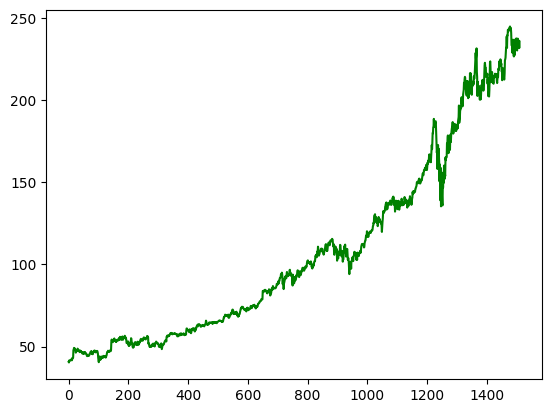

In [16]:
plt.plot(PP["PrecioMicrosoft"],color="green")

<Axes: xlabel='Fecha'>

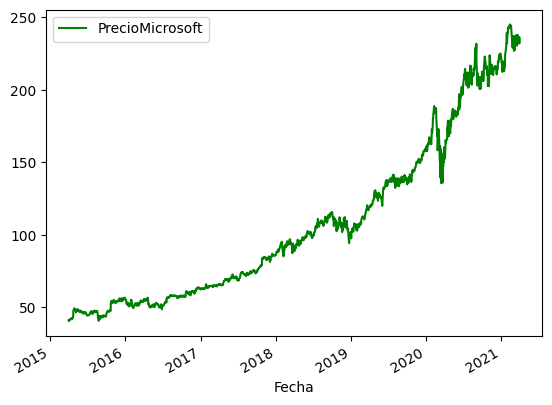

In [18]:
PP.plot(x="Fecha", y="PrecioMicrosoft",color="green")

In [19]:
SecuenciaPrecios = list(PP["PrecioMicrosoft"])
print(SecuenciaPrecios)

[40.72, 40.29, 41.55, 41.53, 41.42, 41.48, 41.72, 41.76, 41.65, 42.26, 42.16, 41.62, 42.91, 42.64, 42.99, 43.34, 47.87, 48.03, 49.16, 49.06, 48.64, 48.66, 48.24, 47.6, 46.28, 46.7, 47.75, 47.37, 47.35, 47.63, 48.72, 48.3, 48.01, 47.58, 47.58, 47.42, 46.9, 46.59, 47.61, 47.45, 46.86, 47.23, 46.92, 46.85, 46.36, 46.14, 45.73, 45.65, 46.61, 46.44, 45.97, 45.48, 45.83, 45.97, 46.72, 46.1, 46.23, 45.91, 45.64, 45.65, 45.26, 44.37, 44.15, 44.45, 44.4, 44.39, 44.3, 44.24, 44.52, 44.61, 45.54, 45.62, 45.76, 46.66, 46.62, 46.92, 47.28, 45.54, 46.11, 45.94, 45.35, 45.34, 46.29, 46.88, 46.7, 46.81, 47.54, 47.58, 46.62, 46.74, 47.33, 46.41, 46.74, 46.73, 47.0, 47.32, 47.27, 46.61, 45.66, 43.07, 41.68, 40.47, 42.71, 43.9, 43.93, 43.52, 41.82, 43.36, 43.5, 42.61, 43.89, 43.07, 43.29, 43.48, 43.04, 43.98, 44.3, 44.25, 43.48, 44.11, 43.9, 43.87, 43.91, 43.94, 43.29, 43.44, 44.26, 44.61, 45.57, 46.63, 46.75, 46.8, 47.45, 47.11, 47.0, 46.89, 46.68, 47.01, 47.51, 47.62, 47.77, 47.2, 48.03, 52.87, 54.25, 

In [20]:
DescomponerSerie(SecuenciaPrecios,12)

(array([[ 40.72,  40.29,  41.55, ...,  42.26,  42.16,  41.62],
        [ 40.29,  41.55,  41.53, ...,  42.16,  41.62,  42.91],
        [ 41.55,  41.53,  41.42, ...,  41.62,  42.91,  42.64],
        ...,
        [237.13, 235.75, 234.81, ..., 235.46, 232.34, 236.48],
        [235.75, 234.81, 237.71, ..., 232.34, 236.48, 235.24],
        [234.81, 237.71, 237.04, ..., 236.48, 235.24, 231.85]]),
 array([ 42.91,  42.64,  42.99, ..., 235.24, 231.85, 235.77]))

In [21]:
for i in range(len(X)):
    print(X[i], y[i])

[40.72, 40.29, 41.55, 41.53, 41.42, 41.48, 41.72, 41.76, 41.65, 42.26, 42.16, 41.62] 42.91
[40.29, 41.55, 41.53, 41.42, 41.48, 41.72, 41.76, 41.65, 42.26, 42.16, 41.62, 42.91] 42.64
[41.55, 41.53, 41.42, 41.48, 41.72, 41.76, 41.65, 42.26, 42.16, 41.62, 42.91, 42.64] 42.99
[41.53, 41.42, 41.48, 41.72, 41.76, 41.65, 42.26, 42.16, 41.62, 42.91, 42.64, 42.99] 43.34
[41.42, 41.48, 41.72, 41.76, 41.65, 42.26, 42.16, 41.62, 42.91, 42.64, 42.99, 43.34] 47.87
[41.48, 41.72, 41.76, 41.65, 42.26, 42.16, 41.62, 42.91, 42.64, 42.99, 43.34, 47.87] 48.03
[41.72, 41.76, 41.65, 42.26, 42.16, 41.62, 42.91, 42.64, 42.99, 43.34, 47.87, 48.03] 49.16
[41.76, 41.65, 42.26, 42.16, 41.62, 42.91, 42.64, 42.99, 43.34, 47.87, 48.03, 49.16] 49.06
[41.65, 42.26, 42.16, 41.62, 42.91, 42.64, 42.99, 43.34, 47.87, 48.03, 49.16, 49.06] 48.64
[42.26, 42.16, 41.62, 42.91, 42.64, 42.99, 43.34, 47.87, 48.03, 49.16, 49.06, 48.64] 48.66
[42.16, 41.62, 42.91, 42.64, 42.99, 43.34, 47.87, 48.03, 49.16, 49.06, 48.64, 48.66] 48.24

In [52]:
# define model
model = Sequential()
model.add(Dense(20, activation='relu', input_dim=12))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='ADAM', metrics=['accuracy'])

In [53]:
#TRAIN THE MODEL
model.fit(X, y, epochs=10, batch_size=10)

Epoch 1/10
150/150 [==============================] - 1s 2ms/step - loss: 16.1537 - accuracy: 0.0000e+00
Epoch 2/10
150/150 [==============================] - 0s 2ms/step - loss: 13.1311 - accuracy: 0.0000e+00
Epoch 3/10
150/150 [==============================] - 0s 2ms/step - loss: 11.6877 - accuracy: 0.0000e+00
Epoch 4/10
150/150 [==============================] - 0s 2ms/step - loss: 11.9459 - accuracy: 0.0000e+00
Epoch 5/10
150/150 [==============================] - 0s 2ms/step - loss: 10.9169 - accuracy: 0.0000e+00
Epoch 6/10
150/150 [==============================] - 0s 2ms/step - loss: 11.2319 - accuracy: 0.0000e+00
Epoch 7/10
150/150 [==============================] - 0s 2ms/step - loss: 10.8844 - accuracy: 0.0000e+00
Epoch 8/10
150/150 [==============================] - 0s 2ms/step - loss: 11.4957 - accuracy: 0.0000e+00
Epoch 9/10
150/150 [==============================] - 0s 2ms/step - loss: 10.3711 - accuracy: 0.0000e+00
Epoch 10/10
150/150 [==============================] - 

In [54]:
#PREDICCIONES`
print("Generate predictions for 12 samples")
predictions = model.predict(X)
print("predictions shape:", predictions)

Generate predictions for 12 samples
47/47 [==============================] - 0s 1ms/step
predictions shape: [[ 42.499638]
 [ 42.952854]
 [ 42.748104]
 ...
 [239.22963 ]
 [238.29657 ]
 [236.11389 ]]


In [55]:
Predictions=pd.DataFrame(predictions)
Predictions.columns = ["Predictions"]
Predictions.head()

,Predictions
0,42.499638
1,42.952854
2,42.748104
3,42.834732
4,43.621231


In [56]:
Real=pd.DataFrame(y)
Real.columns = ["Real"]
Real.head()

,Real
0,42.91
1,42.64
2,42.99
3,43.34
4,47.87


In [57]:
RealPredictions=pd.concat([Predictions,Real],axis=1)
RealPredictions=pd.DataFrame(RealPredictions)
RealPredictions.head()

,Predictions,Real
0,42.499638,42.91
1,42.952854,42.64
2,42.748104,42.99
3,42.834732,43.34
4,43.621231,47.87


<Axes: >

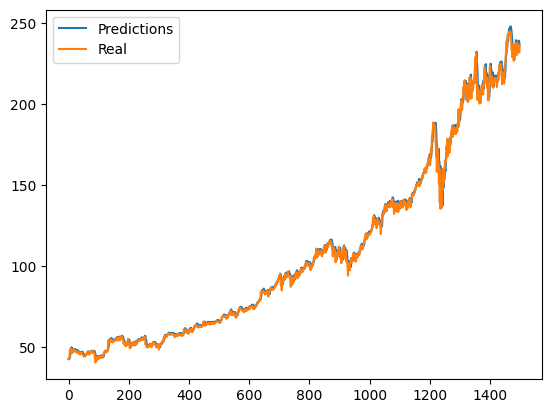

In [58]:
RealPredictions.plot(y=['Predictions','Real'])

In [117]:
# demonstrate prediction
x_input = array([237.71,237.04,230.72,230.35,235.99,237.58,235.46,232.34,236.48,235.24,231.85,235.77])
x_input = x_input.reshape((1, 12))
x_input

array([[237.71, 237.04, 230.72, 230.35, 235.99, 237.58, 235.46, 232.34,
        236.48, 235.24, 231.85, 235.77]])

In [118]:
valores_nuevos=[]
for i in range(12):
    # Predecir el siguiente valor basado en los datos iniciales
    siguiente_valor = model.predict(np.reshape(x_input,(1,12)))
    
    # Agregar el siguiente valor a los datos iniciales para la siguiente iteración
    x_input = np.append(x_input, siguiente_valor)
    x_input = x_input[1:]  # Descartar el primer valor para mantener solo los últimos 12
    
    # Guardarlos un arreglo
    valores_nuevos.append(siguiente_valor)

1/1 [==============================] - 0s 37ms/step


In [119]:
valores_nuevos = np.array(valores_nuevos)
print(valores_nuevos)

[[[237.1463 ]]

 [[236.78687]]

 [[237.93695]]

 [[240.37149]]

 [[241.09103]]

 [[240.66096]]

 [[242.99991]]

 [[244.38933]]

 [[243.88411]]

 [[245.39552]]

 [[247.13263]]

 [[247.74625]]]
